# Introduction to Clustering 

Clsutering means grouping of data. It is an unsupervised learning as input data doesn't have the labeled data. In unsupervised learning, algorithm generates the labeled data. 

# k-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [11]:
np.exp(1)

2.7182818284590451

In [3]:
np.random.seed(200)

In [4]:
def datapoints(radius,theta=360):
    data = []
    for i in range(1,theta):
        i = i/(2*np.pi)
        for j in range(1,radius):
            r = j*np.power(np.exp(1),i)
            x = r*math.cos(i)
            y = r*math.sin(i)
            data.append((x,y))
    return data

df = pd.DataFrame(datapoints(5))
df = df.append(datapoints(10))
df= df.append(datapoints(20))
df

,0,1
0,1.157701e+00,1.858255e-01
1,2.315402e+00,3.716509e-01
2,3.473102e+00,5.574764e-01
3,4.630803e+00,7.433019e-01
4,1.305740e+00,4.302606e-01
5,2.611480e+00,8.605211e-01
6,3.917220e+00,1.290782e+00
7,5.222960e+00,1.721042e+00
8,1.431703e+00,7.407528e-01
9,2.863406e+00,1.481506e+00


In [15]:
def datapoints (radius, n = 100):
    data = []
    for i in range(1,n+1):
        x = math.cos(2*math.pi/n*i)*radius + np.random.normal(-30,30)
        y = math.sin(2*math.pi/n*i)*radius + np.random.normal(-30,30)
        data.append((x,y))
    return data


In [16]:
df = pd.DataFrame(datapoints(500,1000))
df = df.append(datapoints(400,600))
df = df.append(datapoints(200,400))


In [5]:
def datanoise(data):
    x = np.random.randint(1,600)
    y = np.random.randint(1,600)
    data.append([(x,y)])
    return data

In [6]:
df = datanoise(df)
df.columns = ["XCoord","YCoord"]
df

,XCoord,YCoord
0,1.157701e+00,1.858255e-01
1,2.315402e+00,3.716509e-01
2,3.473102e+00,5.574764e-01
3,4.630803e+00,7.433019e-01
4,1.305740e+00,4.302606e-01
5,2.611480e+00,8.605211e-01
6,3.917220e+00,1.290782e+00
7,5.222960e+00,1.721042e+00
8,1.431703e+00,7.407528e-01
9,2.863406e+00,1.481506e+00


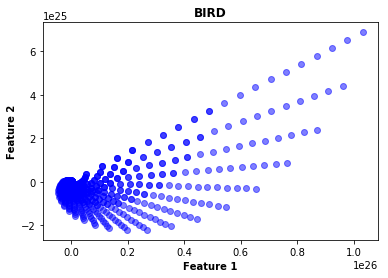

In [25]:
plt.scatter(df["XCoord"],df["YCoord"],color="blue",alpha=0.5)
plt.title("BIRD", fontweight="bold")
plt.xlabel("Feature 1", fontweight="bold")
plt.ylabel("Feature 2", fontweight="bold")
plt.show()

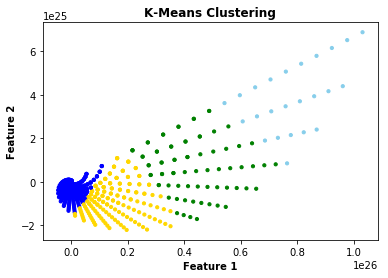

In [24]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4,random_state=200)
k_means.fit(df[["XCoord","YCoord"]])
df["Labels"] = k_means.labels_
colors = ["blue","skyblue","gold","green"]
plt.scatter(df["XCoord"],df["YCoord"],c=df["Labels"],cmap=matplotlib.colors.ListedColormap(colors),s=10)
plt.title("K-Means Clustering",fontweight="bold")
plt.xlabel("Feature 1", fontweight="bold")
plt.ylabel("Feature 2", fontweight="bold")
plt.show()

# Hierarchical Clustering

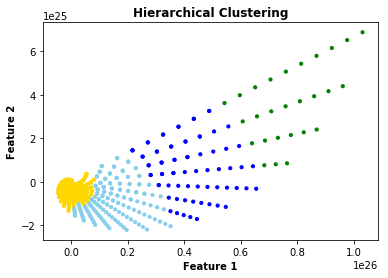

In [23]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,affinity="euclidean")
model.fit(df[["XCoord","YCoord"]])
df["Hierarchical_labels"] = model.labels_
plt.scatter(df["XCoord"],df["YCoord"],c=df["Hierarchical_labels"],cmap=matplotlib.colors.ListedColormap(colors),s=10)
plt.title("Hierarchical Clustering",fontweight="bold")
plt.xlabel("Feature 1", fontweight="bold")
plt.ylabel("Feature 2", fontweight="bold")
plt.show()

# DBSCAN Clustering

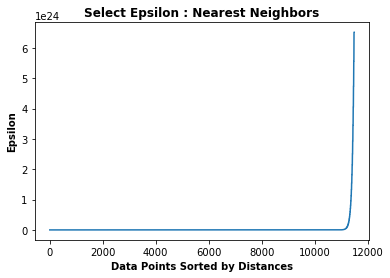

In [26]:
from sklearn.neighbors import NearestNeighbors
n = NearestNeighbors(n_neighbors=3)
nbrs = n.fit(df[["XCoord","YCoord"]])
distance, indices = nbrs.kneighbors(df[["XCoord","YCoord"]])
dis = np.sort(distance,axis=0)
dis = dis[:,1]
plt.plot(dis)
plt.ylabel("Epsilon",fontweight="bold")
plt.xlabel("Data Points Sorted by Distances",fontweight="bold")
plt.title("Select Epsilon : Nearest Neighbors", fontweight="bold")
plt.show()

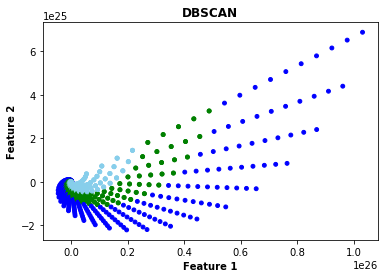

In [32]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps=1.5,min_samples=2)
dbsc.fit(df[["XCoord","YCoord"]])
df["DBSCAN_Labels"] = dbsc.labels_
#df["DBSCAN_Labels"].value_counts()
plt.scatter(df["XCoord"],df["YCoord"],c=df['DBSCAN_Labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title("DBSCAN",fontweight="bold")
plt.xlabel("Feature 1", fontweight="bold")
plt.ylabel("Feature 2",fontweight = "bold")
plt.show()